# Анализ успешности продукта для ритейлера

**Описание проекта**

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План исследования:**
- Ознакомиться с данными.
- Провести предобработку таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
- Провести анализ (количества выпускаемых игр, изменения продаж платформ) и выбрать на основе этого акктаульный период для исследования.
- Изучить в актуальном периоде продажи платформ, зависимость продаж от отзывов и жанров игр.
- Составить портреты пользователей для купных регионов.
- Оформить проект и сделать вывод.

### Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
#Загрузим данные из файла в датафрейм
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# переименуем столбцы в соответствии со «змеиным_регистром»
data.columns = data.columns.str.lower()

#### Описание данных
* 		name — название игры
* 		platform — платформа
* 		year_of_release — год выпуска
* 		genre — жанр игры
* 		na_sales — продажи в Северной Америке (миллионы проданных копий)
* 		eu_sales — продажи в Европе (миллионы проданных копий)
* 		jp_sales — продажи в Японии (миллионы проданных копий)
* 		other_sales — продажи в других странах (миллионы проданных копий)
* 		critic_score — оценка критиков (максимум 100)
* 		user_score — оценка пользователей (максимум 10)
* 		rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
# Изучим общую информацию о полученном датафрейме
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
print('Число явных дубликатов:', data.duplicated().sum())

Число явных дубликатов: 0


<font color='#8A2BE2'>Посмотрим, есть ли неявные дубликаты (искать будем по совпадению трех столбцов - имени, платформе и году релиза):<font />

In [7]:
data['name'] = data['name'].str.lower() 

In [8]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Строка 14244 имеет пропуск в названии (и в других столбцах) - удалим из-за пропусков.

In [9]:
data.query('name == "madden nfl 13" & platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Во второй строке потеряна большая часть данных о продажах, возможно произошол сбой при внесении данных в базу, удалим вторую строку.

In [10]:
# удаление неявных дубликатов
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

In [11]:
# Посмотрим на долю пропущенных значений в каждом столбце
(data.isna().sum()/len(data)*100).sort_values()

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.005983
genre               0.005983
year_of_release     1.609526
user_score         40.088554
rating             40.477473
critic_score       51.319332
dtype: float64

#### Вывод
    
- получен датафрейм из 11 столбцов и 16715 строк,
- явных дубликатов нет,
- есть пропуски в 6 столбцах из 11, неверные типы данных:
  - **year_of_release** (float64) - 1.6% пропусков, должен быть тип int,
  - **critic_score** (float64) - 51.3% пропусков, должен быть тип int,
  - **user_score** (object) - 54.6% пропусков, должен быть тип float64,
  - **name** - 0.01% пропусков,
  - **genre**  - 0.01% пропусков, 
  - **rating** - 40.4% пропусков.

### Предобработка данных

#### Изменение неверных типов данных 


In [12]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

In [13]:
# посмотрим на значения в столбце user_score (object) 
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
0.2       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

> TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить.

Т.е. tbd в данных это пропуск, значения нет, приведем к привычному формату:

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.7      2
0.2      2
0.9      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [15]:
# изменим тип данных
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


 ####  Изучение и предобработка пропущенных значений

<a id='intro'></a>
<font color='#8A2BE2'>Случайные пропуски:<font />

- name и genre (0.01%)  - скорее всего пропуски получены из-за сбоев в передаче/внесении информации в базу, восстановить данные невозможно и доля пропусков мала, поэтому удаляем.
- пропуски в столбце year_of_release (1.6%) - у игры не может не быть года создания, значит пропуски обусловлены техническими причинами (информация передали в неверном формате и при обработке получили пропуски или информация вообще не была передана).

<font color='#8A2BE2'>Неслучайные пропуски:<font />

- critic_score и user_score:
  - для того, чтобы игра получила оценки, нужно время, возможно заполнение этих столбцов в базе осуществлялось в течении какого-то фиксированного периода после выпуска игры, но не все игры к этому моменту получили оценки,
  - оценки игре выставлялись на ресурсах, данные с которых не были доступны при составлении базы,
  - возможно для получения рейтинга необходимо не менее n-ого количества оценок, а игра столько не получила.
  
 - rating -  ESRB присваивает рейтинг не всем играм мира + для оценки игры и присвоения категории нужно время - это модет обуславливать пропуски.

In [16]:
# посмотрим на строки с пропусками в name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,<NA>,NaN,NaN


Таких значений мало (+ это одновременно строки с пропусками в genre), продажи данных игр стремятся к нулю, можем удалить без вреда для проекта.


In [17]:
data = data.loc[data['name'].notna(), :]

**Пропуски в столбце year_of_release** - 1.6% пропусков, доля мала, заполнять из не целесообразно (можно было бы вручную искать по названию игры или для некоторых игр найти дату в названии), при этом в дальнейшее исследование они не войдут в любом случае (будут отрезаны при выборе актуального периода). Удалим эти данные.

In [18]:
data = data.loc[data['year_of_release'].notna(), :]

**Пропуски в столбцах critic_score** - 51.3% данных **и user_score** - 54.6% данных, для обоих столбцов доли пропусков значительны и это повлияет на исследование, однако заполнить данные невозможно (среднее или медиана приведут к искажению, сдвигу результатов).

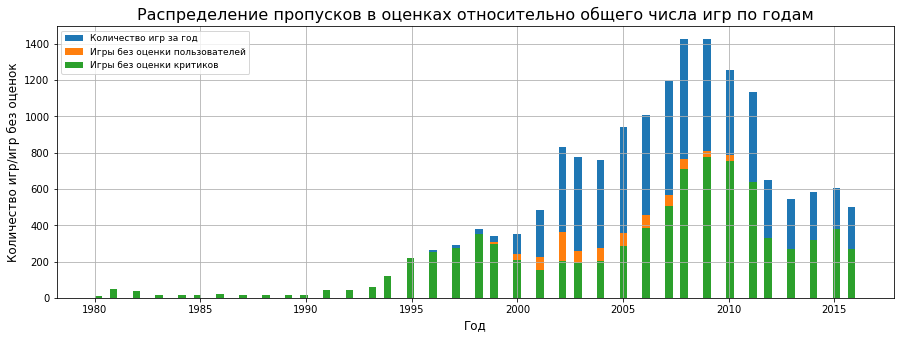

In [19]:
# посмотрим на распределение пропусков в оценках относительно общего числа игр по годам
data['year_of_release'].hist(bins=100, figsize=(15, 5), label='Количество игр за год')
data[data['user_score'].isna()]['year_of_release'].hist(bins=100,
                                                        figsize=(15, 5), label='Игры без оценки пользователей')
data[data['critic_score'].isna()]['year_of_release'].hist(bins=100,
                                                          figsize=(15, 5),
                                                          label='Игры без оценки критиков')
plt.legend(fontsize=9)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество игр/игр без оценок', fontsize=12)
plt.title('Распределение пропусков в оценках относительно общего числа игр по годам', fontsize=16);

За последние 16 лет в каждом году есть игры с оценками, т.е. анализ провести можно.

**В столбце rating** 40.4% пропусков. Entertainment Software Rating Board (ESRB) была основана в 1994 году, в датафрейме данные от 1980 года, что может обуславливать часть пропусков. Заполнить пропуским наиболее распространенным рейтингом не корректно.
Посмотрим какие значения рейтинга есть:

In [20]:
data['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

- E («Everyone») — «Для всех»
- T («Teen») — «Подросткам»
- M («Mature») — «Для взрослых»
- E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
- EC («Early childhood») — «Для детей младшего возраста»
- K-A  «Для всех» ранее
- RP («Rating Pending») — «Рейтинг ожидается»
- AO («Adults Only 18+») — «Только для взрослых»

Заменим значения K-A на E (это одно и то же). 
<font color='#8A2BE2'>ESRB - рейтинг для США и Канады, т.е. отсутствие значений в данном столбце для Японии и Европы ожидаемо, заменим их на 'no_ESRB'.<font />

In [21]:
data.loc[data['rating'].isna(), 'rating'] = 'no_ESRB'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
print(data['rating'].value_counts())
data['rating'].isna().sum()

no_ESRB    6676
E          3923
T          2905
M          1536
E10+       1393
EC            8
RP            1
AO            1
Name: rating, dtype: int64


0

In [22]:
(data.isna().sum()/len(data)*100).sort_values()

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating              0.000000
critic_score       51.456547
user_score         54.618987
dtype: float64

 #### Суммарные продажи во всех регионах

In [23]:
data['all_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,no_ESRB,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,no_ESRB,31.38


<font color='#8A2BE2'>**Вывод**<font />
    
    - названия столбцов в датафрейме приведены к "змеиному регистру";
    - пропуски в столбце name удалены, т.к. информация по этим строкам отсутствует;
    - пропущенные значения year_of_release удалены;
    - в столбце user_score значения tbd заменены на np.NaN;
    - столбец user_score приведен к типу float64;
    - столбец critic_score приведен к типу int;
    - столбец year_of_release приведен к типу int;
    - в столбце rating пропуски заменены на no_ESRB, K-A на E;
    - удалены неявные дубликаты;
    - посчитаны суммарные продажи во всех регионах и записаны в столбец all_sales.

In [24]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

### Исследовательский анализ данных

#### Количество игр, выпущенных в разные годы

Посмотрим, сколько игр выпускалось в разные годы.

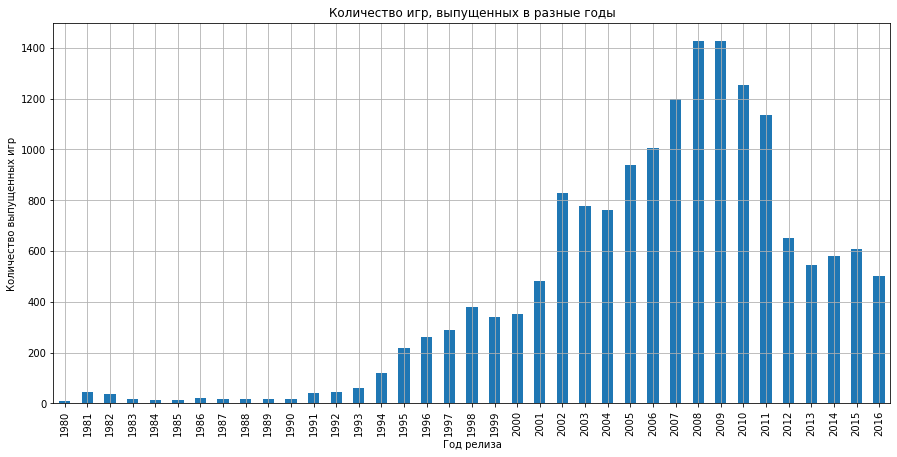

In [25]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count') \
    .plot(y='name', kind='bar', figsize=(15, 7),
          ylabel='Количество выпущенных игр', xlabel='Год релиза',
          title='Количество игр, выпущенных в разные годы', legend=False, grid=True);

- До 1993 года количество выпускаемых игр меньше 50 в год,  с 1994 года рост количества выпущенных игр со скачком в 2002 году, пик приходится на 2008-2009 годы, далее спад и с 2012 года количество выпускаемых игр в два раза меньше, чем на пике. Это может быть связано с развитием игровой индустрии - требования к играм становятся выше и разработка одной игры занимет больше времени и ресурсов, чем в нулевых, поэтому выпускается меньше игр.

- Характерная для текущего периода ситуация на рынке 2013-2016 год.


Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним, за какой характерный срок появляются новые и исчезают старые платформы.

#### Изменения продаж по платформам

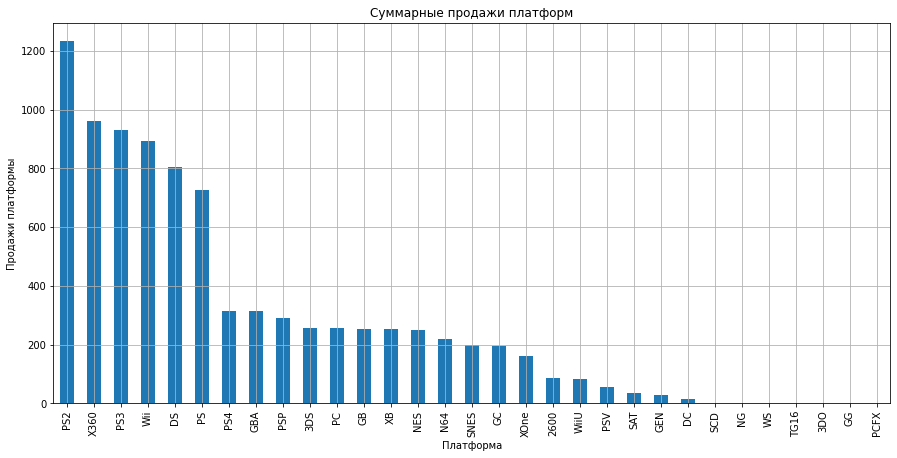

In [26]:
data.pivot_table(index='platform', values='all_sales', aggfunc='sum') \
    .sort_values('all_sales', ascending=False) \
    .plot(y='all_sales', kind='bar', figsize=(15, 7),
          ylabel='Продажи платформы', xlabel='Платформа',
          title='Суммарные продажи платформ', legend=False, grid=True);

Наиболее продаваемыми являются игры на платформах PS2, X360, PS3, Wii, DS, PS (более 600 миллионов проданных копий). Посмотрим на распределение продаж игр на этих платформах по годам:

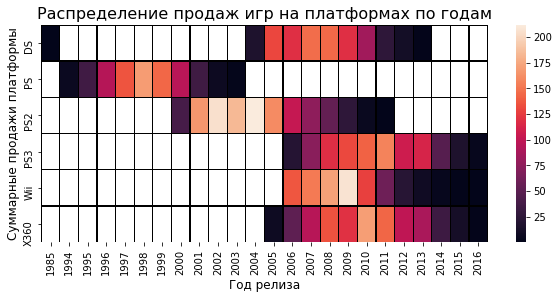

In [27]:
top = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').query('all_sales > 600').index
platform_top = data.query('platform in @top')

plt.figure(figsize=(10, 4))
platform_sales = platform_top.pivot_table(index='platform', columns='year_of_release',
                                          values='all_sales', aggfunc='sum')
sns.heatmap(data=platform_sales, linewidths=.3, linecolor='black')
plt.xlabel('Год релиза', fontsize=12)
plt.ylabel('Суммарные продажи платформы', fontsize=12)
plt.title('Распределение продаж игр на платформах по годам', fontsize=16);

В среднем популярные платформы "живут" 10 лет, пик продаж приходится на 4-6 год.

 Есть странность в данных по платформе DS -  Nintendo DS (яп. ニンテンドーDS Нинтэндо: DS, сокращённо NDS либо DS) — была выпущена в 2004 году. Поддержка прекращена 31 августа 2013. Т.е. данных по этой платформе за 1985 год быть не должно. Для нашего исследования это не страшно - данные не войдут в актуальный период, но на всякий случай взглянем на распределения по остальным платформам:


In [28]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

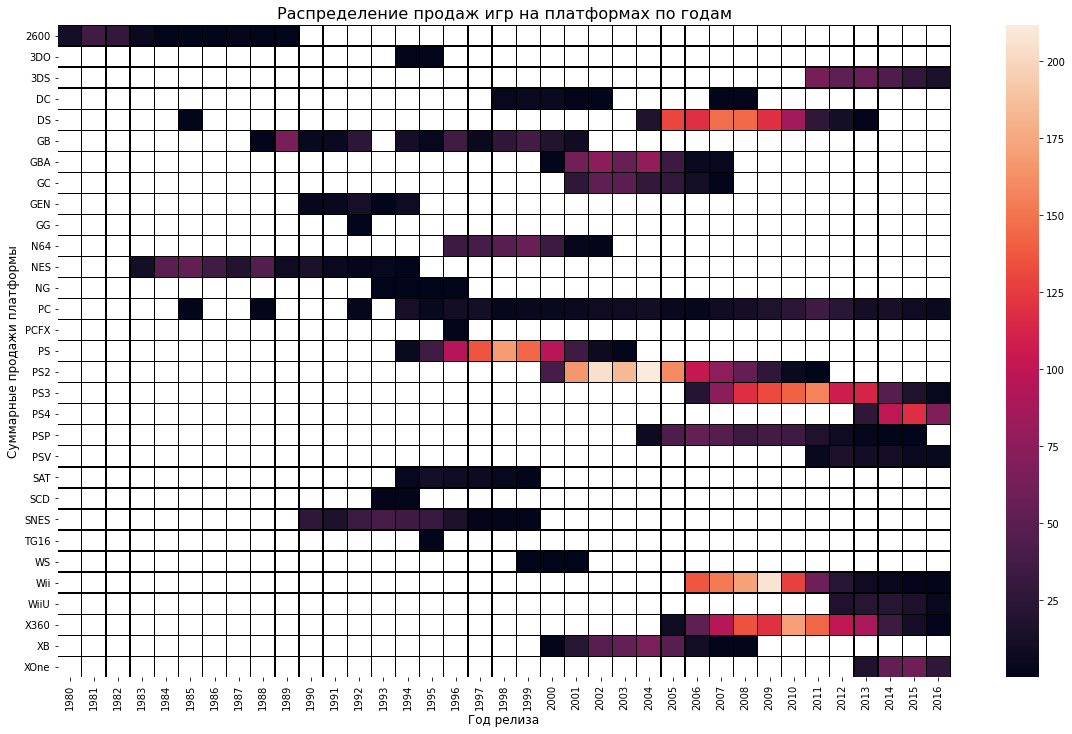

In [29]:
plt.figure(figsize=(20, 12))
platform_sales = data.pivot_table(index='platform', columns='year_of_release',
                                  values='all_sales', aggfunc='sum')
sns.heatmap(data=platform_sales, linewidths=.3, linecolor='black')
plt.xlabel('Год релиза', fontsize=12)
plt.ylabel('Суммарные продажи платформы', fontsize=12)
plt.title('Распределение продаж игр на платформах по годам', fontsize=16);

В течении "стабильного" периода (12-16годы) странностей в распределении нет. Но так как игровая индустрия развивается очень быстро возьмем за актуальный период данные за последние три года.

#### Поведение платформ актуального периода

##### Суммарные продажи платформ

Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.


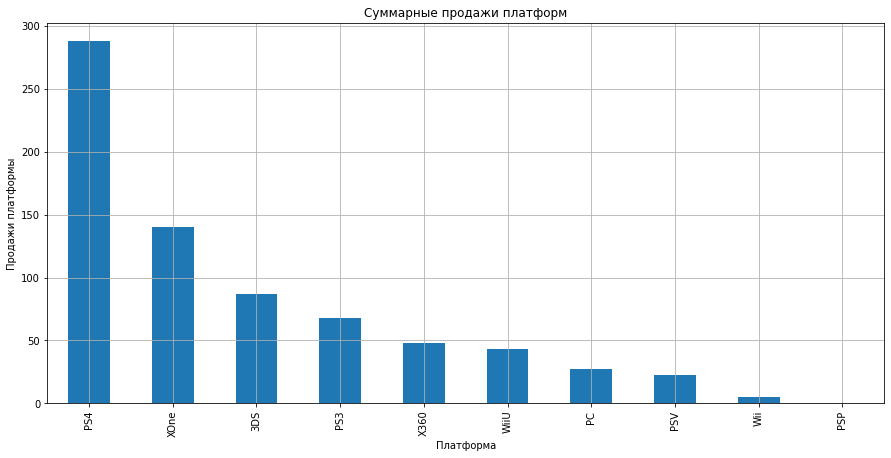

In [30]:
actual_data = data.query('year_of_release >= 2014')
actual_data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False) \
    .plot(y='all_sales', kind='bar', figsize=(15, 7),
          ylabel ='Продажи платформы', xlabel='Платформа',
          title='Суммарные продажи платформ', legend=False, grid=True);

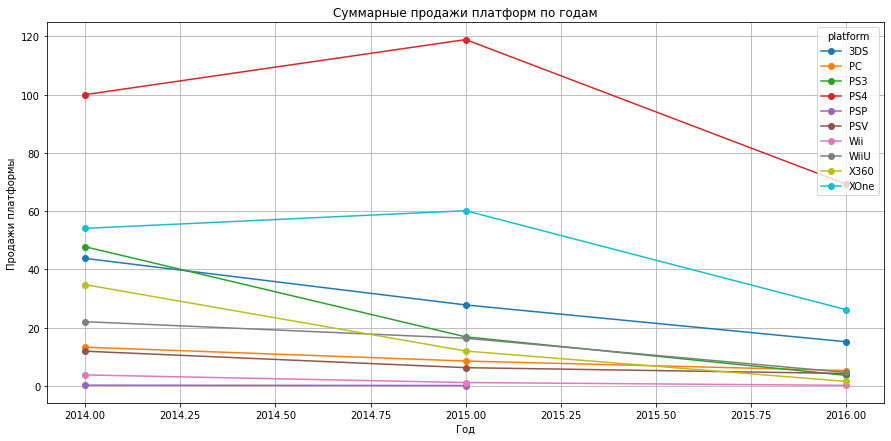

In [31]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum') \
    .plot(style='o-', kind='line', figsize=(15, 7),
          ylabel='Продажи платформы', xlabel='Год', 
          title='Суммарные продажи платформ по годам', grid=True);

На конец 2016 года потенциально прибыльные платформы:

- PS4 - самые большие суммарные продажи + молодая платформа (с 2013 года) - в ближайшее время можно ожидать пик продаж,
- XОne - на втором месте по суммарным продажам, тоже запущенна в 2013 году,
- 3DS - на третьем месте по суммарным продажам, запущенна в 2011 году.


PC - не можем назвать прибыльной, но игры для ПК стабильны - можно ожидать от них такого же уровня продаж.

##### Боксплот по глобальным продажам игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

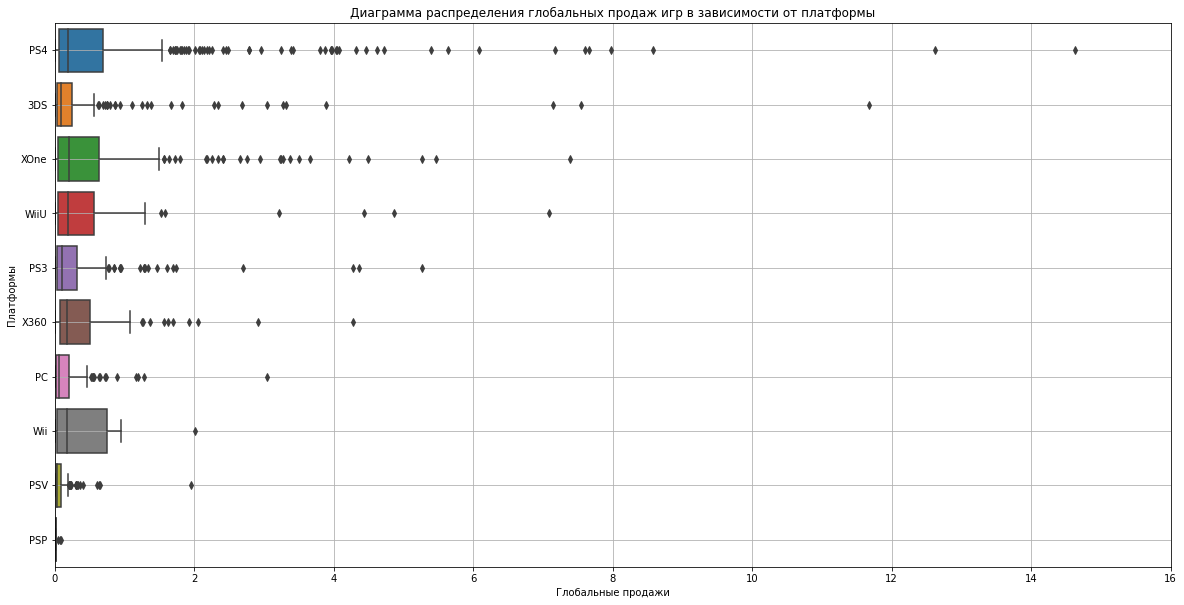

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(y='platform', x='all_sales', data=actual_data, orient='h', ax=ax)
ax.grid()
ax.set_xlim(0,16)
ax.set(xlabel='Глобальные продажи', ylabel='Платформы')
ax.set_title('Диаграмма распределения глобальных продаж игр в зависимости от платформы');

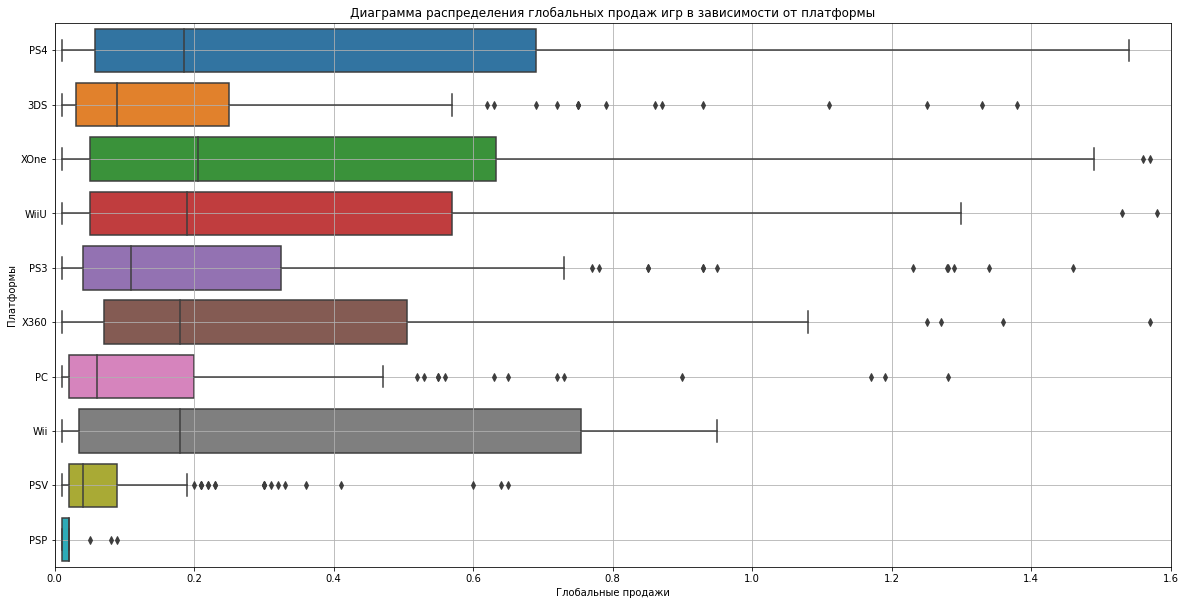

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(y='platform', x='all_sales', data=actual_data, orient='h', ax=ax)
ax.grid()
ax.set_xlim(0,1.6)
ax.set(xlabel='Глобальные продажи', ylabel='Платформы')
ax.set_title('Диаграмма распределения глобальных продаж игр в зависимости от платформы');

- PS4 лидирует в суммарных продажах благодаря выбросам - две игры с продажами более 12 млн. копий, при этом медиана меньше, чем у XOne.
- 3DC - большая часть игр продаются посредственно (малая медиана), продаваемость держится на выбросах.
- XOne - самая большая медиана и относительно других платформ выбросов немного, т.е. на данной платформе игры продаются стабильно хорошо.

##### Диаграмма рассеяния и корреляция между отзывами и продажами

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

 Для анализа возьмем PS4 - лидера по продажам.

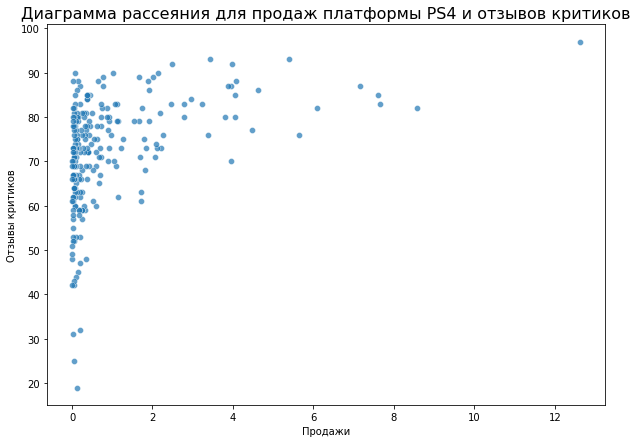

In [34]:
actual_data_ps4 = actual_data.query('platform == "PS4"')
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x='all_sales', y='critic_score', data=actual_data_ps4, alpha=0.7, ax=ax)
plt.xlabel('Продажи')
plt.ylabel('Отзывы критиков')
plt.title('Диаграмма рассеяния для продаж платформы PS4 и отзывов критиков', fontsize=16);

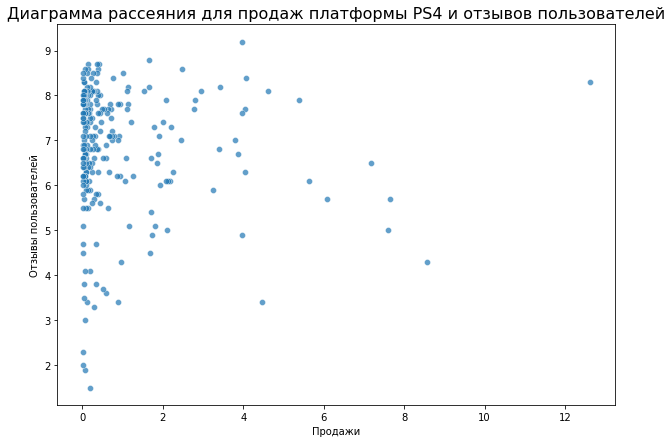

In [35]:
actual_data_ps4 = actual_data.query('platform == "PS4"')
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x='all_sales', y='user_score', data=actual_data_ps4, alpha=0.7, ax=ax)
plt.xlabel('Продажи')
plt.ylabel('Отзывы пользователей')
plt.title('Диаграмма рассеяния для продаж платформы PS4 и отзывов пользователей', fontsize=16);

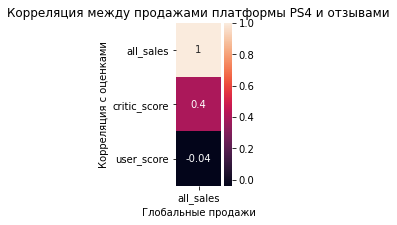

In [36]:
actual_data_ps4_filtered = actual_data_ps4[['all_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(1,3))
sns.heatmap(actual_data_ps4_filtered.corr()[['all_sales']], annot=True)
plt.xlabel('Глобальные продажи')
plt.ylabel('Корреляция с оценками')
plt.title('Корреляция между продажами платформы PS4 и отзывами', fontsize=12);

Взаимосвязь между отзывами критиков и продажами есть, но корреляция довольно слабая (0.4). Связи между продажами и отзывами пользователей нет.

Соотнесем выводы с продажами игр на других платформах.


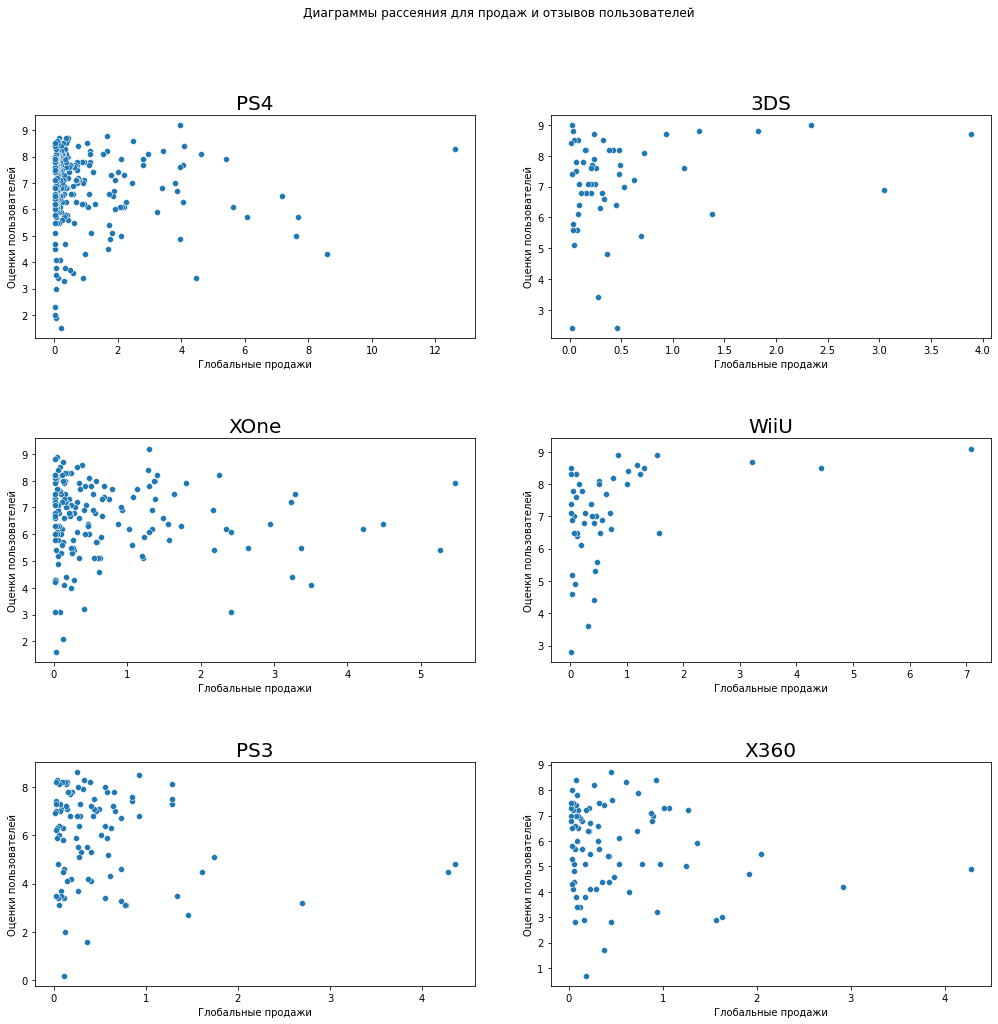

In [37]:
rows = 3
cols = 2
f, axs = plt.subplots(rows, cols, figsize=(15, 15))
plt.suptitle('Диаграммы рассеяния для продаж и отзывов пользователей')
count = 0
for r in range(rows): 
    for c in range(cols):
        curr_platform = actual_data['platform'].unique()[count]
        actual_data_filtered = actual_data.query('platform == @curr_platform')[['all_sales', 'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.scatterplot(x='all_sales', y='user_score', data=actual_data_filtered, ax=axs[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set(xlabel='Глобальные продажи', ylabel='Оценки пользователей')
        plt.tight_layout(pad=4)
        count += 1

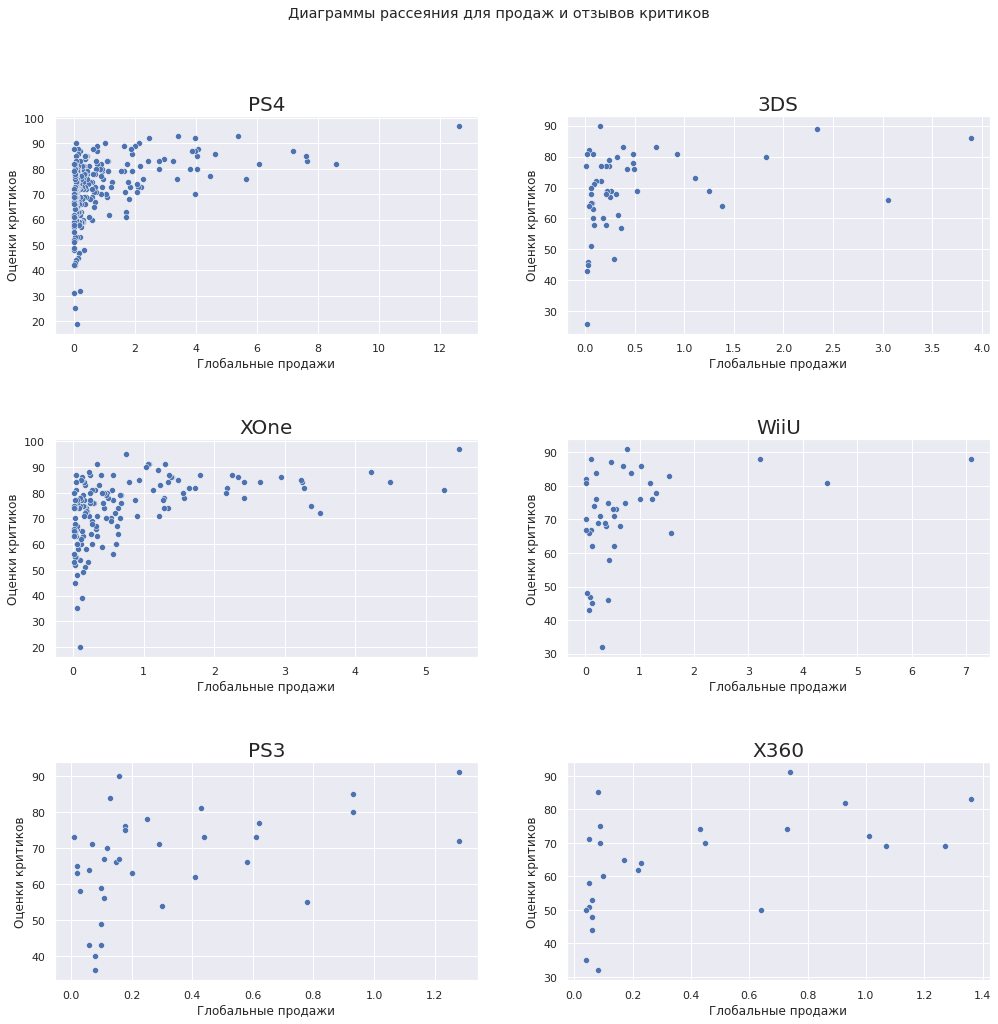

In [38]:
rows = 3
cols = 2
f, axs = plt.subplots(rows, cols, figsize=(15, 15))
plt.suptitle('Диаграммы рассеяния для продаж и отзывов критиков')
count = 0
for r in range(rows): 
    for c in range(cols):
        curr_platform = actual_data['platform'].unique()[count]
        actual_data_filtered = actual_data.query('platform == @curr_platform')[['all_sales', 'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.scatterplot(x='all_sales', y='critic_score', data=actual_data_filtered, ax=axs[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set(xlabel='Глобальные продажи', ylabel='Оценки критиков')
        plt.tight_layout(pad=4)
        count += 1

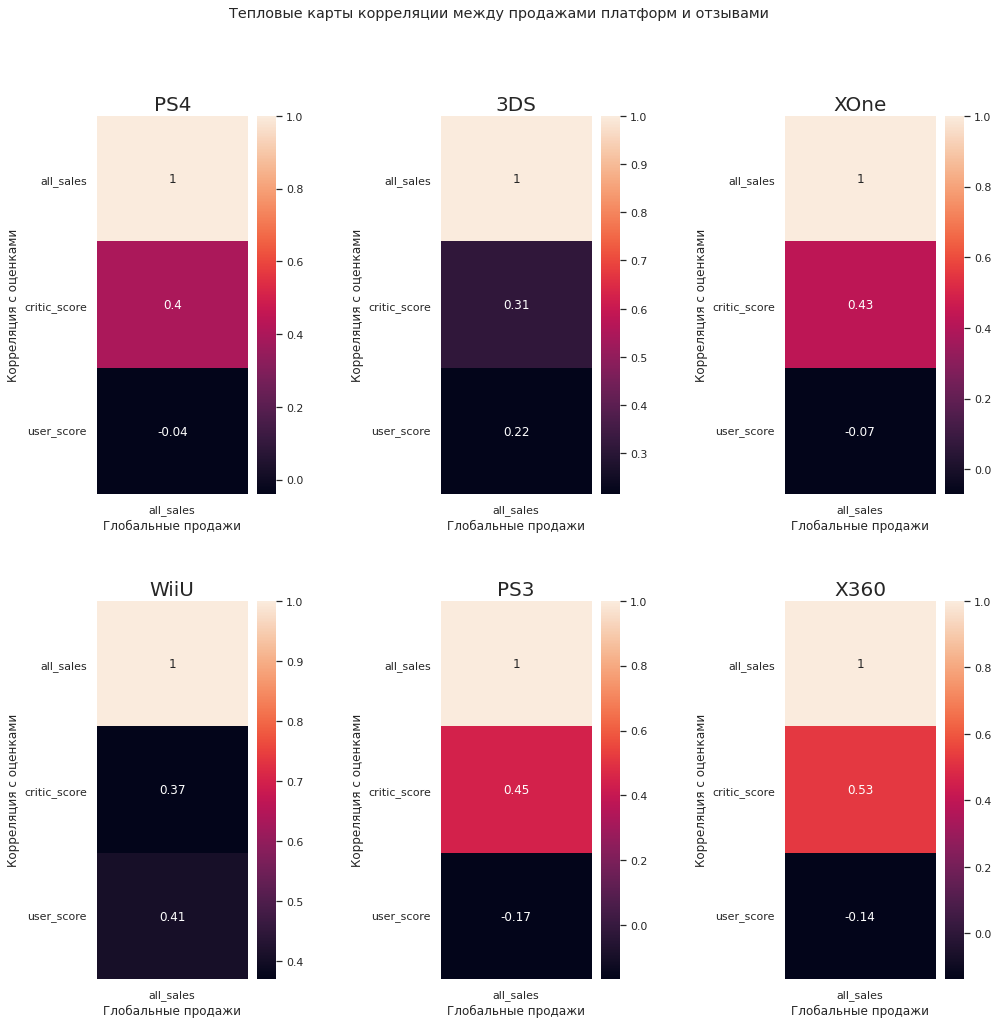

In [39]:
rows = 2 # количество строк сетки
cols = 3 # количество стоблцов сетки
f, axs = plt.subplots(rows, cols, figsize=(15, 15)) # subplots для построения нескольких графиков в сетке
# f - инициализация области для рисунка, axs - оси, на которых будут отображаться данные
plt.suptitle('Тепловые карты корреляции между продажами платформ и отзывами')
count = 0 # счетчик для продвижения по списку столбцов
for r in range(rows): # строка в сетке 
    for c in range(cols): # столбец в сетке 
        curr_platform = actual_data['platform'].unique()[count]
        actual_data_filtered = actual_data.query('platform == @curr_platform')[['all_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(actual_data_filtered.corr()[['all_sales']], annot=True, ax=axs[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        ax.set(xlabel='Глобальные продажи', ylabel='Корреляция с оценками')
        plt.tight_layout(pad=4)
        count += 1

Данные по корреляции между продажами и оценкой для большей части платформ сопоставима с данными по платформе  PS4. Взаимосвязь между отзывами критиков и продажами есть, но корреляция слабая. Связи между продажами и отзывами пользователей нет.

Выделяются платформы от Nintendo WiiU и DS (корреляция с отзывами пользователей очень слабая).

##### Общее распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. 

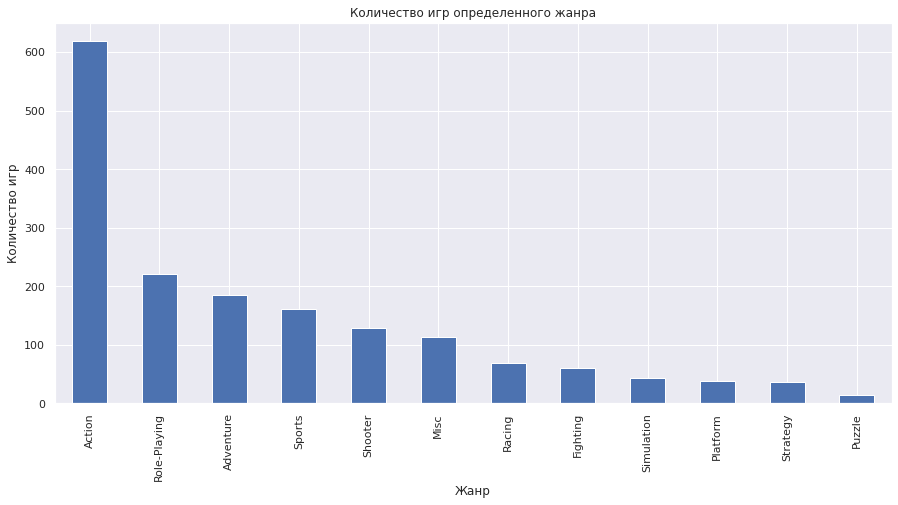

In [40]:
actual_data.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name', ascending=False) \
    .plot(y='name', kind='bar', figsize=(15, 7),
          ylabel ='Количество игр', xlabel='Жанр',
          title='Количество игр определенного жанра', legend = False, grid = True);

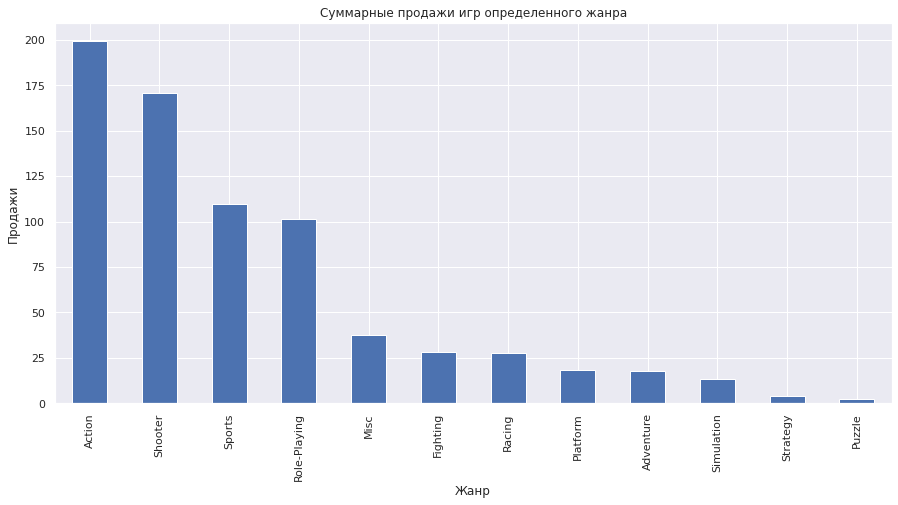

In [41]:
actual_data.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False) \
    .plot(y='all_sales', kind='bar', figsize=(15, 7),
          ylabel ='Продажи', xlabel='Жанр',
          title='Суммарные продажи игр определенного жанра', legend = False, grid = True);

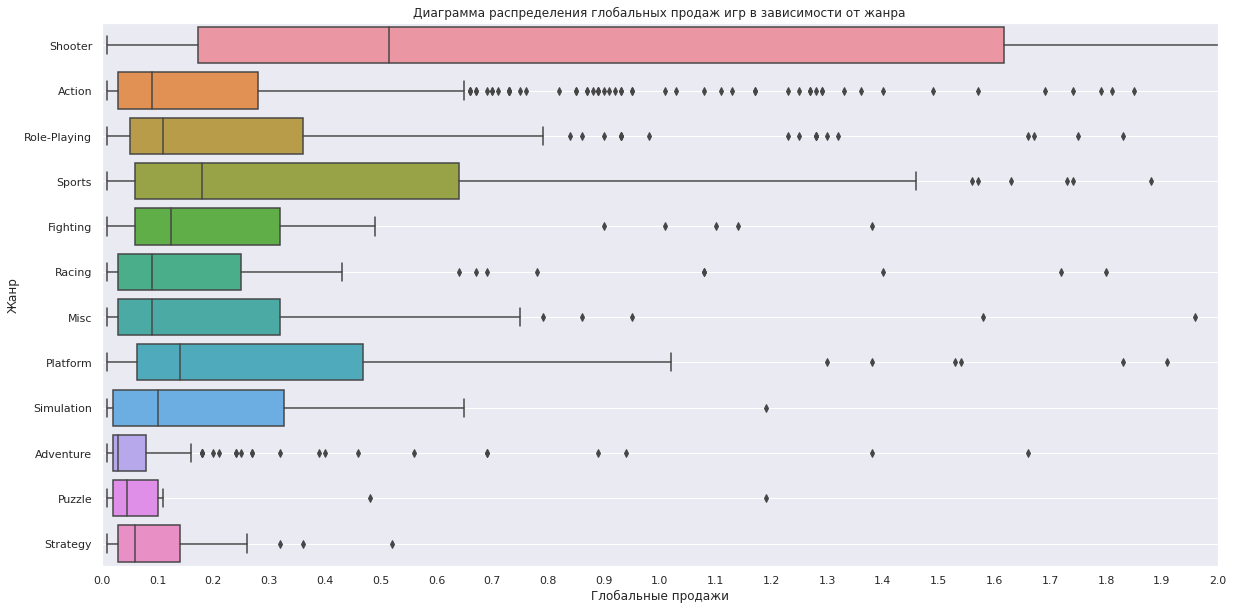

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(y='genre', x='all_sales', data=actual_data, orient='h', ax=ax)
ax.grid()
ax.set_xlim(0,2)
ax.xaxis.set(ticks=np.arange(0,2.1,0.1));
ax.set(xlabel='Глобальные продажи', ylabel='Жанр')
ax.set_title('Диаграмма распределения глобальных продаж игр в зависимости от жанра');

4 самых популярных жанра игр: Action, Shooter, Sports, Role-Playing.

- Shooter -  на 5 месте по количеству выпускаемых игр, при этом медианное значение самое высокое среди всех жанров, по суммарным продажам на втором месте, т.е. игры этого жанра пользуются популярностью и большая их часть продается очень хорошо.

- Action - на первом месте и по продажам и по количеству игр, медиана ниже 0.1 миллиона проданных копий, т.е. в данном жанре множество игр, которые "не заходят" и подходить к выбору игр в этом жанре нужно очень осторожно.

Наименее продаваемые жанры: Strategy и Puzzle.


#### Портрет пользователя каждого региона

##### Самые популярные платформы (топ-5) для пользователя каждого региона

In [43]:
# функция для создания таблицы с топ-5 для региона
def get_top_5(region, group_val):
    group_data = actual_data.groupby(by=group_val)[region].agg('sum').sort_values(ascending=False).to_frame()
    group_data_sum = group_data[region].sum()
    top_5 = group_data[:5].index
    group_data.index = group_data.index.where(group_data.index.isin(top_5),'Other')
    return (group_data.groupby(by=group_data.index)[region].agg('sum'))/group_data_sum*100

In [44]:
top_5_sales_platform = pd.concat([get_top_5('na_sales', 'platform'),
                                    get_top_5('eu_sales', 'platform'),
                                    get_top_5('jp_sales', 'platform')], axis=1)
top_5_sales_platform

,na_sales,eu_sales,jp_sales
platform,,,
3DS,7.970147,5.955372,47.523902
Other,10.980075,12.841732,0.816414
PS3,7.762445,9.435496,12.052852
PS4,34.714497,48.041968,16.134923
X360,9.962684,NaN,NaN
XOne,28.610153,17.086597,NaN
PC,NaN,6.638836,NaN
PSV,NaN,NaN,15.619293
WiiU,NaN,NaN,7.852616


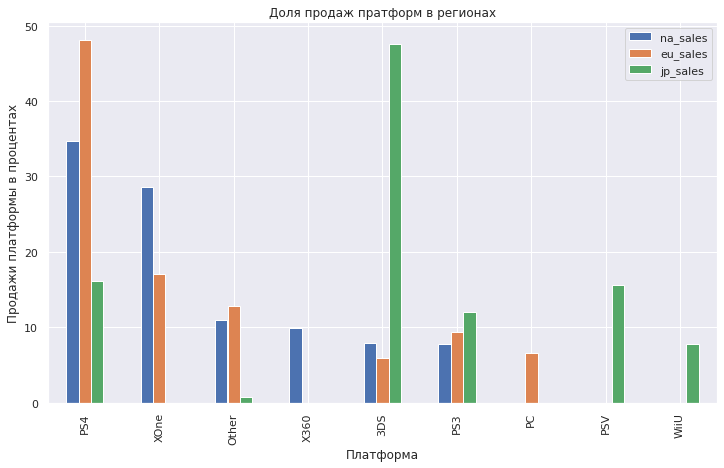

In [45]:
top_5_sales_platform.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(12, 7),
                                                                     ylabel ='Продажи платформы в процентах',
                                                                     xlabel='Платформа',
                                                                      title='Доля продаж пратформ в регионах', 
                                                                      grid = True);

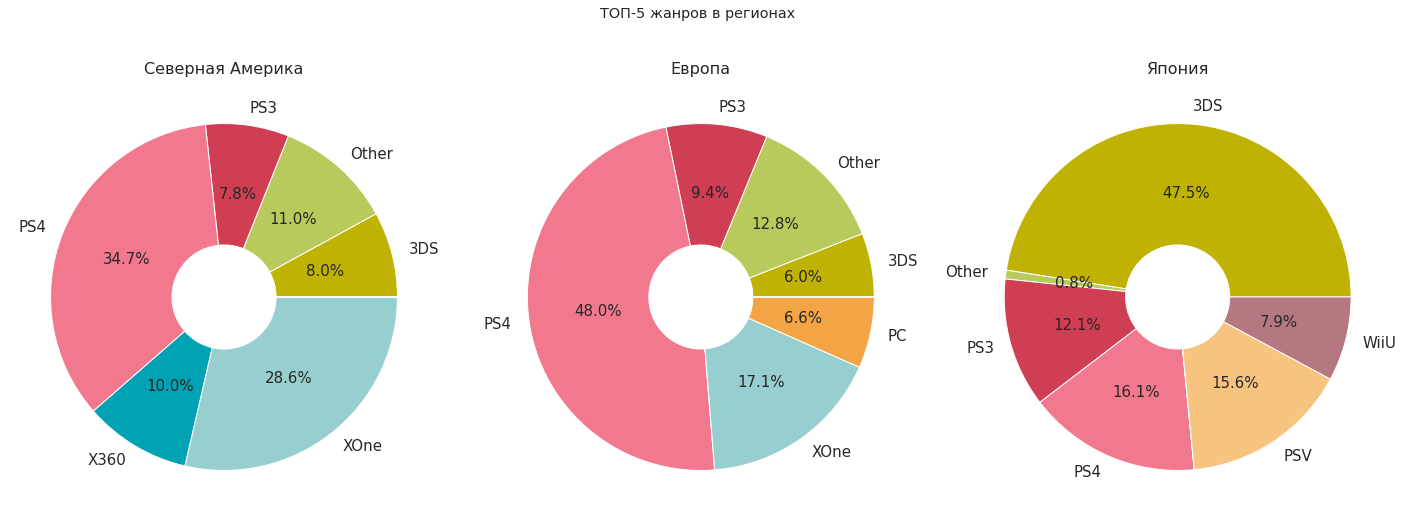

In [46]:
colors = ['#BFB202FF', '#B9CA5DFF', '#CF3E53FF', '#F1788DFF', '#00A2B3FF', '#97CFD0FF',
          '#F3A546FF', '#F7C480FF', '#B47880FF']
ax = top_5_sales_platform.plot.pie(subplots=True,
                                figsize=(20, 8),
                                autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
                                textprops={'fontsize': 15},
                                legend=False,
                                wedgeprops=dict(width=0.7),
                                title='ТОП-5 жанров в регионах',
                                colors=colors)
plt.tight_layout()
for i in range(3):
    ax[i].axis('off')
ax[0].set_title('Северная Америка', fontsize=16)
ax[1].set_title('Европа', fontsize=16)
ax[2].set_title('Япония', fontsize=16);

Топ-5 по Северной Америке: PS4, XOne, X360, 3DS, PS3

Топ-5 по Европе: PS4, XOne, PS3, 3DS, PC

Топ-5 по Японии: 3DS, PSV, PS4, PS3, WiiU

По графику видим, что распраделение платформ на европейском и американском рынках сильно отличается от японского:
- самая популярная платформа на японском рынке - 3DS (47.5%), в других регионах занимает менее 10%. - вторая по популярности платформа PS4 - на других рынках лидирует.
- третья (PSV) и пятая (WiiU) позиция японского топа не вошли в топы других рынков.


- первые две позиции топа для американского и европейского рынка одинаковы - PS4 и XOne, но в Европе процент для PS4 выше
- на американском рынке в топ вошла X360 (на других рынках нет)
- в Европе в топе игры на PC


##### Самые популярные  жанры (топ-5) для пользователя каждого региона

In [47]:
top_5_sales_genre = pd.concat([get_top_5('na_sales', 'genre'),
                                    get_top_5('eu_sales', 'genre'),
                                    get_top_5('jp_sales', 'genre')], axis=1)
top_5_sales_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,25.533338,27.589774,31.775701
Misc,5.298176,NaN,6.026426
Other,13.328170,15.682725,16.650553
Role-Playing,11.782722,10.407123,33.472983
Shooter,27.818067,24.205704,5.231496
Sports,16.239527,16.894488,NaN
Racing,NaN,5.220186,NaN
Fighting,NaN,NaN,6.842840


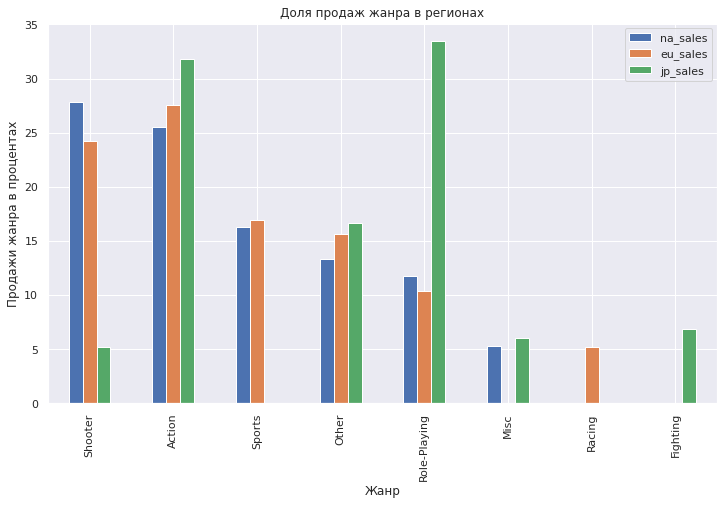

In [48]:
top_5_sales_genre.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(12, 7),
                                                                     ylabel ='Продажи жанра в процентах',
                                                                     xlabel='Жанр',
                                                                      title='Доля продаж жанра в регионах', 
                                                                      grid = True);

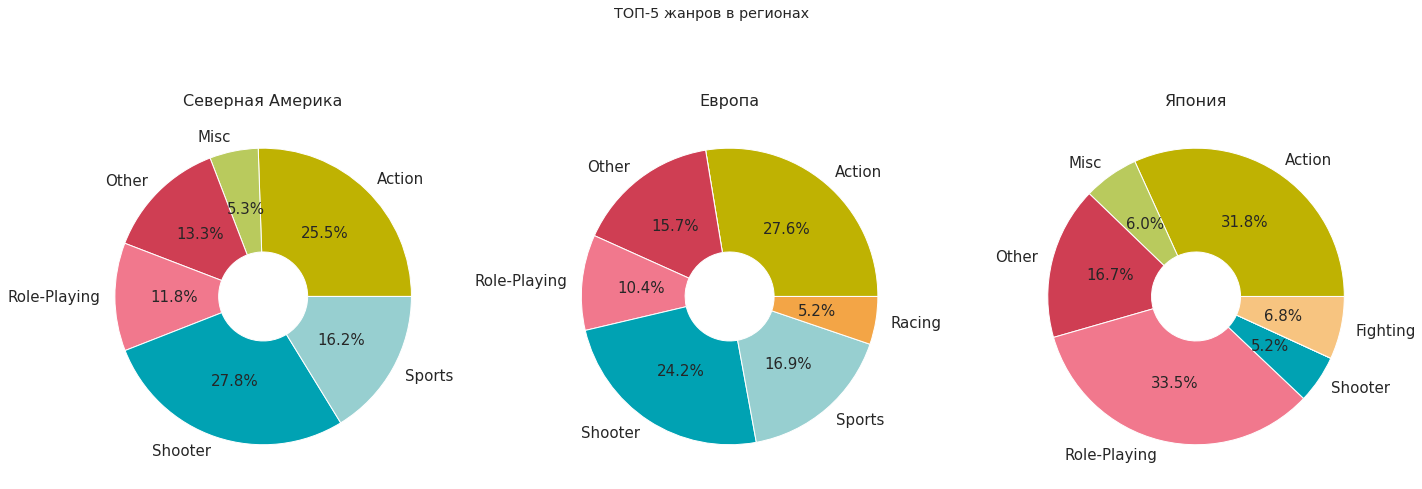

In [49]:
colors = ['#BFB202FF', '#B9CA5DFF', '#CF3E53FF', '#F1788DFF', '#00A2B3FF', 
          '#97CFD0FF', '#F3A546FF', '#F7C480FF']
ax = top_5_sales_genre.plot.pie(subplots=True,
                                figsize=(20, 8),
                                autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
                                textprops={'fontsize': 15},
                                legend=False,
                                wedgeprops=dict(width=0.7),
                                title='ТОП-5 жанров в регионах',
                                colors=colors)
plt.tight_layout()
for i in range(3):
    ax[i].axis('off')
ax[0].set_title('Северная Америка', fontsize=16)
ax[1].set_title('Европа', fontsize=16)
ax[2].set_title('Япония', fontsize=16);

Во всех регионах популярный жанр Action (не менее 25%).

В Японии наиболее популярными являются жанры - Role-Playing и Action, остальные жанры пользуются меньшей популярностью.

В США и Европе самые популярные жанры - Action и Shooter, на третьем месте игры в жанре Sports.

##### Влияние рейтинга ESRB на продажи в отдельном регионе

In [50]:
def get_rating(region):
    return actual_data.groupby('rating')[region].agg('sum').sort_values(ascending=False)

sales_rating = pd.concat([get_rating('na_sales'),
                           get_rating('eu_sales'),
                           get_rating('jp_sales')], axis=1)
sales_rating

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
no_ESRB,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


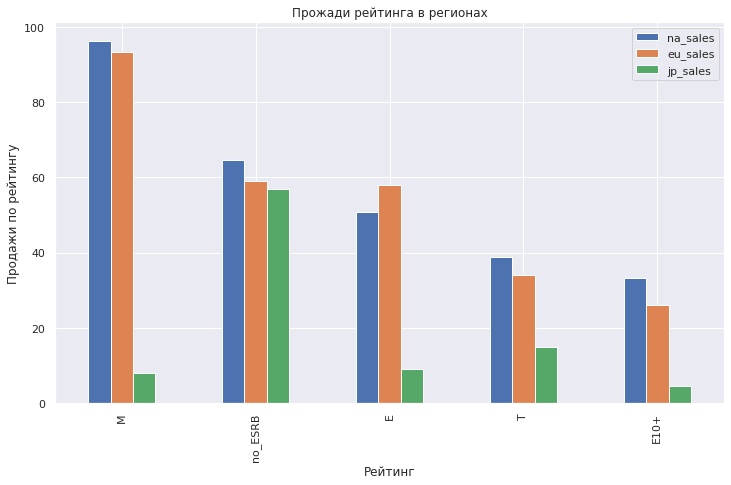

In [51]:
sales_rating.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(12, 7),
                                                                     ylabel ='Продажи по рейтингу',
                                                                     xlabel='Рейтинг',
                                                                      title='Прожади рейтинга в регионах', 
                                                                      grid = True);

В Европе и Америке наиболее часто выбирают игры с рейтингом М (Для взрослых), в Японии большая часть игр не имеет рейтинга ESRB, на втором месте игры рейтинга T «Подросткам».

- E («Everyone») — «Для всех»
- T («Teen») — «Подросткам»
- M («Mature») — «Для взрослых»
- E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
- RP («Rating Pending») — «Рейтинг ожидается»

### Общий вывод

**Обработан архив исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах:**

- заполнены пропущенные значения там, где это возможно, 
- заменены типы данных,
- проведен анализ по данным и подготовлены актуальные данные,
- составлены портреты пользователей для купных регионов продаж.

**Вывод на основе исследовательского анализа:**

- Пик количества выпускаемых игр приходится на 2008-2009 годы, с 2012 года количество выпускаемых игр в два раза меньше, чем на пике. Скорее всего это связано с новым этапом развития игровой индустрии - требования к играм становятся выше и разработка одной игры занимет больше времени и ресурсов, чем в нулевых, поэтому выпускается меньше игр, ожидать роста или падения скорее всего не стоит. Характерная для текущего периода ситуация на рынке это 2012-2016 год. В целях прогнозирования рынка на 2017 год взят срез данных с 2014 по 2016 год включительно (т.к. имеем дело с быстро развивающейся отраслью).
- В среднем популярные платформы "живут" 10 лет, пик продаж приходится на 4-6 год.
- На конец 2016 года потенциально прибыльные платформы:

   - PS4 - самые большие суммарные продажи + молодая платформа (с 2013 года) - в ближайшее время можно ожидать пик продаж,
   - XОne - на втором месте по суммарным продажам, тоже запущенна в 2013 году,
   - 3DS - на третьем месте по суммарным продажам, запущенна в 2011 году.
- Взаимосвязь между отзывами критиков и продажами есть, но корреляция слабая. Связи между продажами и отзывами пользователей нет.
- 4 самых популярных жанра игр: Action, Shooter, Sports, Role-Playing:

  - Shooter - игры этого жанра пользуются популярностью и большая их часть продается очень хорошо, стоит закупать.

  - Action - в данном жанре множество игр, которые "не заходят" и подходить к выбору игр в этом жанре нужно очень осторожно.

- Наименее продаваемые жанры: Strategy и Puzzle.

**Выявление портрета типичного пользователя:**

- Северная Америка: предпочитает платформы PS4 и  XOne, наиболее популярные жанры -  Action, Shooter и Sports, рейтинг игр - М;
- Европа: предпочитает платформы PS4 и  XOne, наиболее популярные жанры -  Action, Shooter и Sports, рейтинг игр - М;
- Япония: предпочитает платформы 3DS, PSV, PS4, наиболее популярные жанры -  Role-Playing и Action, рейтинг игр - неопределен по ESRB или T.
